In [1]:
import pandas as pd
import random
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Generate sample data
data = {
    "Age": [random.randint(20, 60) for _ in range(100)],
    "Gender": [random.choice(["Male", "Female"]) for _ in range(100)],
    "Total_Annual_Contribution": [round(random.uniform(3000, 24000), 2) for _ in range(100)],
    "Annual_Withdrawals": [round(random.uniform(0, 5000), 2) for _ in range(100)],
    "Account_Balance": [round(random.uniform(10000, 500000), 2) for _ in range(100)],
    "Dividend_Rate": [random.choice([5.0, 5.2, 5.5, 6.0]) for _ in range(100)],
    "Projected_Income_Growth": [round(random.uniform(2.0, 10.0), 2) for _ in range(100)],
}

# Create a DataFrame
df = pd.DataFrame(data)

In [3]:
# Preprocessing: Convert Dividend Rate to a decimal
df["Dividend_Rate"] = df["Dividend_Rate"] / 100

# Calculate years to 2030 for each individual
current_year = datetime.now().year
df["Years_to_2030"] = 2030 - current_year


In [4]:
# Future Value Calculation
def calculate_future_balance(row):
    balance = row["Account_Balance"]
    annual_contribution = row["Total_Annual_Contribution"]
    annual_withdrawal = row["Annual_Withdrawals"]
    rate = row["Dividend_Rate"]
    years = row["Years_to_2030"]
    
    for _ in range(years):
        balance += annual_contribution - annual_withdrawal
        balance *= (1 + rate)
    return round(balance, 2)

df["Projected_Balance_2030"] = df.apply(calculate_future_balance, axis=1)


In [5]:
# Retirement Needs Estimation: Inflation-adjusted value for 2030
present_value = 390000  # EPF recommendation in 2024 (in RM)
annual_inflation_rate = 0.03  # Assume 3% annual inflation
years_to_2030 = 2030 - 2024  # Number of years to 2030

future_value_2030 = present_value * (1 + annual_inflation_rate) ** years_to_2030
df["Estimated_Retirement_Needs"] = future_value_2030  # Apply to dataset

# Determine if individuals meet the estimated needs
df["Meets_Retirement_Needs"] = df["Projected_Balance_2030"] >= df["Estimated_Retirement_Needs"]


C:\Users\ALIEFAKMAL\AppData\Local\Temp\ipykernel_15344\3412640124.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bar_data, x="Category", y="Count", palette="viridis")


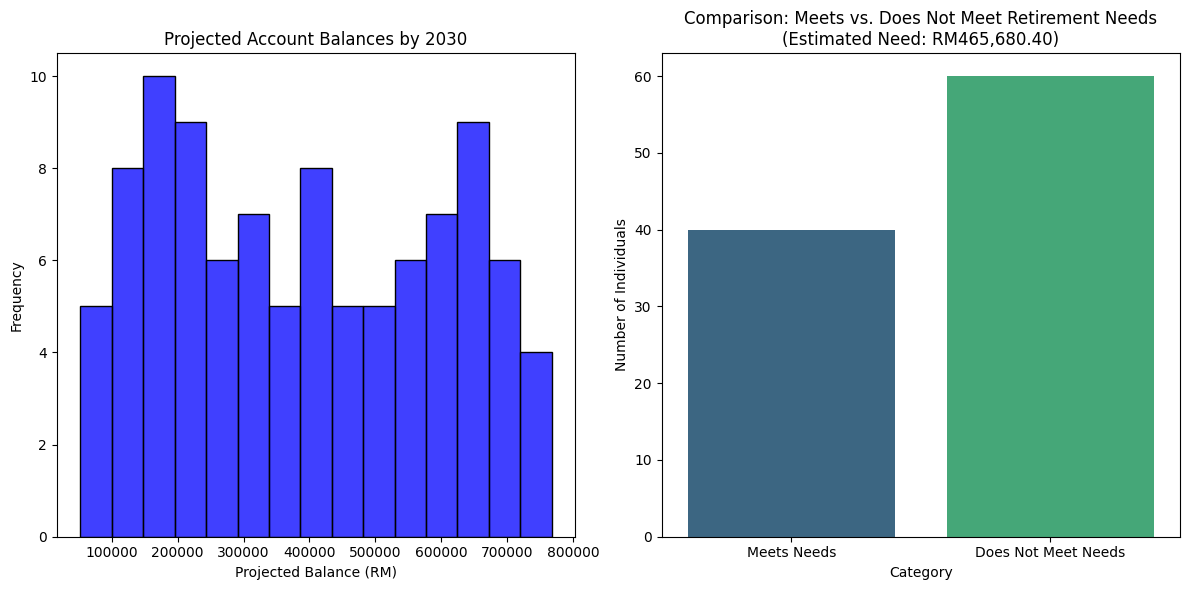

Estimated fund needed to retire in 2030: RM465,680.40


In [6]:
# Visualization
plt.figure(figsize=(12, 6))

# 1. Histogram of Projected Balances
plt.subplot(1, 2, 1)
sns.histplot(df["Projected_Balance_2030"], bins=15, color="blue")
plt.title("Projected Account Balances by 2030")
plt.xlabel("Projected Balance (RM)")
plt.ylabel("Frequency")

# 2. Bar chart: Retirement Needs vs. Projected Balances
plt.subplot(1, 2, 2)
bar_data = pd.DataFrame({
    "Category": ["Meets Needs", "Does Not Meet Needs"],
    "Count": [df["Meets_Retirement_Needs"].sum(), (~df["Meets_Retirement_Needs"]).sum()]
})
sns.barplot(data=bar_data, x="Category", y="Count", palette="viridis")
plt.title(f"Comparison: Meets vs. Does Not Meet Retirement Needs\n(Estimated Need: RM{future_value_2030:,.2f})")
plt.ylabel("Number of Individuals")

# Adjust layout and show plot
plt.tight_layout()
plt.show()

# Console Output
print(f"Estimated fund needed to retire in 2030: RM{future_value_2030:,.2f}")


In [7]:
# Function to calculate retirement sufficiency
def calculate_retirement_sufficiency(age, monthly_contribution, current_balance=0, annual_dividend_rate=5.0, inflation_rate=3.0):
    """
    Calculate if the user can retire comfortably by age 60 based on their monthly EPF contribution.
    """
    years_to_60 = 60 - age
    if years_to_60 <= 0:
        return {"error": "You are already 60 or older. Retirement planning should be adjusted for your age."}

    # Calculate projected balance at 60
    balance = current_balance
    annual_contribution = monthly_contribution * 12
    annual_rate = annual_dividend_rate / 100

    for _ in range(years_to_60):
        balance += annual_contribution
        balance *= (1 + annual_rate)

    # Calculate inflation-adjusted retirement needs at 60
    present_value = 390000  # EPF recommendation in 2024 (in RM)
    estimated_needs = present_value * (1 + inflation_rate / 100) ** years_to_60

    return {
        "Projected_Balance_60": round(balance, 2),
        "Estimated_Retirement_Needs": round(estimated_needs, 2),
        "Sufficiency": balance >= estimated_needs
    }

In [8]:
# Ask for user inputs
try:
    user_age = int(input("Enter your current age: "))
    user_monthly_contribution = float(input("Enter your monthly EPF contribution (RM): "))
    user_current_balance = float(input("Enter your current EPF account balance (RM, default 0): ") or 0)

    # Calculate sufficiency
    result = calculate_retirement_sufficiency(user_age, user_monthly_contribution, user_current_balance)

    if "error" in result:
        print(result["error"])
    else:
        print(f"\nProjected EPF balance at age 60: RM{result['Projected_Balance_60']:,}")
        print(f"Estimated retirement needs at age 60: RM{result['Estimated_Retirement_Needs']:,}")
        if result["Sufficiency"]:
            print("You are on track to meet your retirement needs!")
        else:
            print("You need to increase your EPF contributions to meet your retirement needs.")
except ValueError:
    print("Invalid input. Please enter numeric values for age, contribution, and balance.")


Enter your current age:  25
Enter your monthly EPF contribution (RM):  900
Enter your current EPF account balance (RM, default 0):  1000



Projected EPF balance at age 60: RM1,029,748.3
Estimated retirement needs at age 60: RM1,097,406.36
You need to increase your EPF contributions to meet your retirement needs.
